In [42]:
print(2)

2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
matches=pd.read_csv('matches.csv')
# players.head()
matches.head()



,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [22]:
deliver=pd.read_csv('deliveries.csv')

In [23]:
data=matches[['season','city','venue','team1','team2','toss_winner','toss_decision','winner']]
data.head()

,season,city,venue,team1,team2,toss_winner,toss_decision,winner
0,2007/08,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,2007/08,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings
2,2007/08,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils
3,2007/08,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore
4,2007/08,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders


In [24]:
data = data.dropna(subset=['winner'])
#Strip extra spaces in names
data['team1'] = data['team1'].str.strip()
data['team2'] = data['team2'].str.strip()
data['toss_winner'] = data['toss_winner'].str.strip()
data['winner'] = data['winner'].str.strip()
team_map = {
    "Delhi Daredevils": "Delhi Capitals",
    "Rising Pune Supergiants": "Rising Pune Supergiant"
}
matches.replace(team_map, inplace=True)


In [26]:
data['winner'].head(30)

0           Kolkata Knight Riders
1             Chennai Super Kings
2                Delhi Daredevils
3     Royal Challengers Bangalore
4           Kolkata Knight Riders
5                Rajasthan Royals
6                Delhi Daredevils
7             Chennai Super Kings
8                Rajasthan Royals
9                 Kings XI Punjab
10               Rajasthan Royals
11            Chennai Super Kings
12                Deccan Chargers
13                Kings XI Punjab
14            Chennai Super Kings
15                 Mumbai Indians
16               Delhi Daredevils
17                Kings XI Punjab
18               Rajasthan Royals
19               Delhi Daredevils
20                Kings XI Punjab
21    Royal Challengers Bangalore
22                 Mumbai Indians
23               Rajasthan Royals
24                Kings XI Punjab
25                Deccan Chargers
26                 Mumbai Indians
27            Chennai Super Kings
28          Kolkata Knight Riders
29            

In [7]:
# Keep only pre-match columns + target
features = ['season', 'city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision']
target = 'winner'

In [8]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Encode target labels into integers
le = LabelEncoder()
data['winner'] = le.fit_transform(data['winner'])
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [9]:
X = pd.get_dummies(data[features], drop_first=True)
y=data['winner']
joblib.dump(X.columns, "feature_columns.pkl")


['feature_columns.pkl']

In [10]:
data.head()

,season,city,venue,team1,team2,toss_winner,toss_decision,winner
0,2007/08,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,8
1,2007/08,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,0
2,2007/08,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,3
3,2007/08,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,16
4,2007/08,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,8


In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Base model
xgb = XGBClassifier(objective='multi:softmax', num_class=len(data['winner'].unique()), eval_metric='mlogloss', use_label_encoder=False)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [3, 5, 7],               # Tree depth
    'learning_rate': [0.01, 0.1, 0.3],    # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],         # Fraction of samples per tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features per tree
    'gamma': [0, 0.1, 0.3],               # Minimum loss reduction for split
    'min_child_weight': [1, 3, 5]         # Minimum sum of instance weight in a child
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
joblib.dump(grid_search, "ipl_model.pkl")

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


c:\Users\thish\miniconda3\envs\DL_env\lib\site-packages\xgboost\training.py:183: UserWarning: [13:48:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Best Accuracy: 0.546605938963512


['ipl_model.pkl']

In [15]:
# Check training & test accuracy
train_acc = accuracy_score(y_train, grid_search.predict(x_train))
test_acc = accuracy_score(y_test, grid_search.predict(x_test))

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Training Accuracy: 0.59
Test Accuracy: 0.53


In [27]:
import pandas as pd
import joblib

# Load model and objects
grid_search = joblib.load("ipl_model.pkl")
le = joblib.load("label_encoder.pkl")
feature_columns = joblib.load("feature_columns.pkl")

def predict_winner(season, city, venue, team1, team2, toss_winner, toss_decision):
    # Create DataFrame for the input
    features = ['season', 'city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision']
    input_df = pd.DataFrame([[season, city, venue, team1, team2, toss_winner, toss_decision]], columns=features)

    # One-hot encode with the same columns as training
    input_encoded = pd.get_dummies(input_df)
    input_encoded = input_encoded.reindex(columns=feature_columns, fill_value=0)  # Match training columns exactly

    # Predict
    pred_label = grid_search.predict(input_encoded)[0]
    pred_team = le.inverse_transform([pred_label])[0]
    return pred_team

# Example
predicted_team = predict_winner(
    season="2017",
    city="Mumbai",
    venue="Wankhede Stadium",
    team1="Mumbai Indians",
    team2="Kolkata Knight Riders",
    toss_winner="Mumbai Indians",
    toss_decision="bat"
)
print("Predicted Winner:", predicted_team)


Predicted Winner: Mumbai Indians


In [28]:
# See what model predicts for various random inputs
test_inputs = [
    ("2017", "Mumbai", "Wankhede Stadium", "Mumbai Indians", "Kolkata Knight Riders", "Mumbai Indians", "bat"),
    ("2018", "Chennai", "M. A. Chidambaram Stadium", "Chennai Super Kings", "Delhi Capitals", "Delhi Capitals", "field"),
    ("2019", "Hyderabad", "Rajiv Gandhi Intl. Cricket Stadium", "Sunrisers Hyderabad", "Rajasthan Royals", "Sunrisers Hyderabad", "bat")
]

for ti in test_inputs:
    print(ti, "=>", predict_winner(*ti))


('2017', 'Mumbai', 'Wankhede Stadium', 'Mumbai Indians', 'Kolkata Knight Riders', 'Mumbai Indians', 'bat') => Mumbai Indians
('2018', 'Chennai', 'M. A. Chidambaram Stadium', 'Chennai Super Kings', 'Delhi Capitals', 'Delhi Capitals', 'field') => Delhi Capitals
('2019', 'Hyderabad', 'Rajiv Gandhi Intl. Cricket Stadium', 'Sunrisers Hyderabad', 'Rajasthan Royals', 'Sunrisers Hyderabad', 'bat') => Sunrisers Hyderabad


using RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
model.fit(x_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.46788990825688076


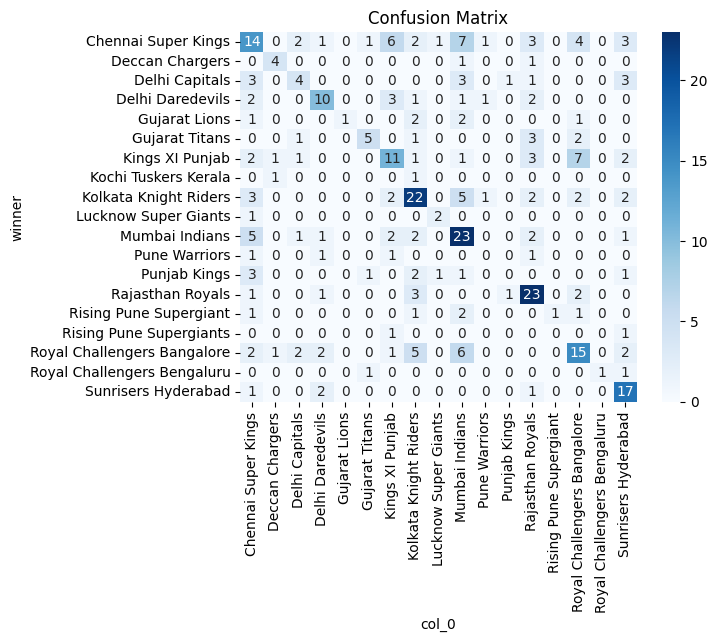

In [39]:
# Confusion Matrix
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()